In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import random
%matplotlib inline

In [101]:
frame = pd.read_csv('for_data_science_newline_fixed.csv', usecols = ["IN FILE","CLIP LENGTH","OFFSET","DURATION","MAX FREQ","MIN FREQ","SAMPLE RATE","LAST MOD BY"])

In [102]:
frame

,IN FILE,CLIP LENGTH,OFFSET,DURATION,MAX FREQ,MIN FREQ,SAMPLE RATE,LAST MOD BY
0,Aburria-aburri-257423.wav,24.6335,2.3614,3.3205,24000,0,44100,alarce
1,Aburria-aburri-257423.wav,24.6335,6.7320,2.0103,24000,0,44100,alarce
2,Aburria-aburri-257423.wav,24.6335,19.2438,3.4505,24000,0,44100,alarce
3,Aburria-aburri-387212.wav,84.4800,0.6011,3.0800,24000,0,44100,alarce
4,Aburria-aburri-387212.wav,84.4800,77.6811,3.1400,24000,0,44100,alarce
...,...,...,...,...,...,...,...,...
31360,Zonotrichia-capensis-232609.wav,98.8560,63.2772,1.8301,24000,0,32000,JacobGlennAyers
31361,Zonotrichia-capensis-232609.wav,98.8560,34.1554,2.4702,24000,0,32000,JacobGlennAyers
31362,Zonotrichia-capensis-377483.wav,18.2596,0.5762,3.2199,24000,0,44100,JacobGlennAyers
31363,Zonotrichia-capensis-377483.wav,18.2596,6.8160,2.1500,24000,0,44100,JacobGlennAyers


In [103]:
CLIP_LENGTHS = frame.groupby("IN FILE")[["CLIP LENGTH"]].max()
SUM_DURATIONS = frame.groupby("IN FILE")[["DURATION"]].sum()

MEDIAN_DURATIONS = frame.groupby("IN FILE")[["DURATION"]].median()
MEDIAN_DURATIONS = MEDIAN_DURATIONS.rename(columns={'DURATION': 'MEDIAN DURATION'})

NUMBER_ANN = frame.groupby("IN FILE")[["OFFSET"]].count()
NUMBER_ANN = NUMBER_ANN.rename(columns = {'OFFSET':'OFFSET COUNT'})

MED_DIST_BW_ANNS = frame.copy(True)

MED_DIST_BW_ANNS = MED_DIST_BW_ANNS.sort_values(['IN FILE','OFFSET'])
MED_DIST_BW_ANNS['ENDSET'] = MED_DIST_BW_ANNS['OFFSET'] + MED_DIST_BW_ANNS['DURATION']

MED_DIST_BW_ANNS = MED_DIST_BW_ANNS[['IN FILE','CLIP LENGTH','OFFSET','ENDSET','LAST MOD BY']]

MED_DIST_BW_ANNS['PREV END'] = MED_DIST_BW_ANNS.loc[MED_DIST_BW_ANNS['IN FILE'].shift(-1) == MED_DIST_BW_ANNS['IN FILE'], 'ENDSET']
MED_DIST_BW_ANNS['PREV END'] = MED_DIST_BW_ANNS['PREV END'].shift()

MED_DIST_BW_ANNS = MED_DIST_BW_ANNS.fillna(0)
MED_DIST_BW_ANNS['DIST BETWEEN ANN PREV'] = MED_DIST_BW_ANNS['OFFSET'] - MED_DIST_BW_ANNS['PREV END']

MED_DIST_BW_ANNS['OVERLAP'] = MED_DIST_BW_ANNS['DIST BETWEEN ANN PREV'].loc[MED_DIST_BW_ANNS['DIST BETWEEN ANN PREV'] < 0]

OVER_LAP = MED_DIST_BW_ANNS.groupby('IN FILE')[['OVERLAP']].count()
OVER_LAP = OVER_LAP.rename(columns = {'OVERLAP':'OVERLAP COUNT'})

DIST_BETWEEN_ANN_PREV = MED_DIST_BW_ANNS.groupby('IN FILE')[['DIST BETWEEN ANN PREV']].median()
DIST_BETWEEN_ANN_PREV = DIST_BETWEEN_ANN_PREV.rename(columns={'DIST BETWEEN ANN PREV': 'MEDIAN DIST B/W ANNS'})

LAST_MOD_BY = MED_DIST_BW_ANNS.groupby('IN FILE')[['LAST MOD BY']].max()

WHITE_SPACE = frame.copy(True)
DUR = WHITE_SPACE.groupby(['IN FILE'])[['DURATION']].sum()
DUR = DUR.rename(columns = {'DURATION':'SUM DURATION'})
LEN = WHITE_SPACE.groupby(['IN FILE'])[['CLIP LENGTH']].max()
WHITE_SPACE = LEN.join(DUR)
WHITE_SPACE['WHITE SPACE'] = WHITE_SPACE['CLIP LENGTH'] - WHITE_SPACE['SUM DURATION']

WHITE_SPACE = WHITE_SPACE.join(OVER_LAP)
WHITE_SPACE = WHITE_SPACE.join(DIST_BETWEEN_ANN_PREV)
WHITE_SPACE = WHITE_SPACE.join(MEDIAN_DURATIONS)
WHITE_SPACE = WHITE_SPACE.join(NUMBER_ANN)
WHITE_SPACE = WHITE_SPACE.join(LAST_MOD_BY)
WHITE_SPACE.reset_index(inplace=True)
WHITE_SPACE

,IN FILE,CLIP LENGTH,SUM DURATION,WHITE SPACE,OVERLAP COUNT,MEDIAN DIST B/W ANNS,MEDIAN DURATION,OFFSET COUNT,LAST MOD BY
0,Aburria-aburri-257423.wav,24.63350,8.7813,15.85220,0,2.36140,3.32050,3,alarce
1,Aburria-aburri-387212.wav,84.48000,9.4200,75.06000,0,26.76000,3.14000,3,alarce
2,Accipiter-bicolor-451839.wav,5.66857,4.6442,1.02437,3,0.00000,0.21550,20,alarce
3,Accipiter-collaris-260335.wav,45.37470,7.6708,37.70390,0,5.19555,1.03010,8,alarce
4,Accipiter-collaris-260336.wav,26.93220,4.8604,22.07180,1,1.03060,0.57010,8,alarce
...,...,...,...,...,...,...,...,...,...
2438,Zimmerius-gracilipes-258668.wav,12.19920,3.2975,8.90170,0,1.48075,0.81325,4,alarce
2439,Zimmerius-gracilipes-258669.wav,27.55920,10.8399,16.71930,0,0.68000,0.52000,21,alarce
2440,Zonotrichia-capensis-232609.wav,98.85600,31.5518,67.30420,0,3.73360,1.70010,17,JacobGlennAyers
2441,Zonotrichia-capensis-377483.wav,18.25960,7.7298,10.52980,0,3.01990,2.35990,3,JacobGlennAyers


In [104]:
def species(row):
    species = row['IN FILE']
    spec = species.split('-')
    # print(spec)
    # print(spec[:-1])
    spec_to = '-'.join(spec[:-2])
    return spec_to

WHITE_SPACE['Genus'] = WHITE_SPACE.apply (lambda row: species(row), axis=1)

# diff_genus = frame[frame['Genus']].value_counts().index_values()#.to_list()
# print(diff_genus[:3])

# WHITE_SPACE = WHITE_SPACE[(WHITE_SPACE['Genus'] ==  'Himantopus-mexicanus') | (WHITE_SPACE['Genus'] ==  'Ramphocaenus-sticturus')] # or 
len(WHITE_SPACE['Genus'].unique())
WHITE_SPACE

,IN FILE,CLIP LENGTH,SUM DURATION,WHITE SPACE,OVERLAP COUNT,MEDIAN DIST B/W ANNS,MEDIAN DURATION,OFFSET COUNT,LAST MOD BY,Genus
0,Aburria-aburri-257423.wav,24.63350,8.7813,15.85220,0,2.36140,3.32050,3,alarce,Aburria
1,Aburria-aburri-387212.wav,84.48000,9.4200,75.06000,0,26.76000,3.14000,3,alarce,Aburria
2,Accipiter-bicolor-451839.wav,5.66857,4.6442,1.02437,3,0.00000,0.21550,20,alarce,Accipiter
3,Accipiter-collaris-260335.wav,45.37470,7.6708,37.70390,0,5.19555,1.03010,8,alarce,Accipiter
4,Accipiter-collaris-260336.wav,26.93220,4.8604,22.07180,1,1.03060,0.57010,8,alarce,Accipiter
...,...,...,...,...,...,...,...,...,...,...
2438,Zimmerius-gracilipes-258668.wav,12.19920,3.2975,8.90170,0,1.48075,0.81325,4,alarce,Zimmerius
2439,Zimmerius-gracilipes-258669.wav,27.55920,10.8399,16.71930,0,0.68000,0.52000,21,alarce,Zimmerius
2440,Zonotrichia-capensis-232609.wav,98.85600,31.5518,67.30420,0,3.73360,1.70010,17,JacobGlennAyers,Zonotrichia
2441,Zonotrichia-capensis-377483.wav,18.25960,7.7298,10.52980,0,3.01990,2.35990,3,JacobGlennAyers,Zonotrichia


In [105]:
genus = WHITE_SPACE['Genus'].unique()
sampled_genus = random.sample(list(genus),5)
sampled_genus

['Himantopus', 'Ornithion', 'Chlorestes', 'Hemitriccus', 'Phrygilus']

In [106]:
filtered_df = WHITE_SPACE[WHITE_SPACE['Genus'].isin(sampled_genus)]
filtered_df

,IN FILE,CLIP LENGTH,SUM DURATION,WHITE SPACE,OVERLAP COUNT,MEDIAN DIST B/W ANNS,MEDIAN DURATION,OFFSET COUNT,LAST MOD BY,Genus
443,Chlorestes-notata-487945.wav,175.96100,194.9705,-19.00950,9,0.20000,4.26000,48,kkong,Chlorestes
915,Hemitriccus-cohnhafti-97441.wav,140.80000,55.0200,85.78000,0,1.74000,0.99500,46,kkong,Hemitriccus
916,Hemitriccus-flammulatus-122593.wav,82.65600,5.9111,76.74490,0,8.02150,0.78010,7,dnelson,Hemitriccus
917,Hemitriccus-griseipectus-11801.wav,33.51510,7.2093,26.30580,0,1.59775,0.40495,16,weszhen,Hemitriccus
918,Hemitriccus-griseipectus-284278.wav,121.78300,23.5025,98.28050,0,2.08240,0.53000,44,dnelson,Hemitriccus
919,Hemitriccus-griseipectus-284279.wav,25.46940,15.6695,9.79990,0,0.32500,0.56995,28,EdZamora,Hemitriccus
920,Hemitriccus-griseipectus-284293.wav,61.07430,38.7865,22.28780,8,0.25000,0.58000,55,EdZamora,Hemitriccus
921,Hemitriccus-iohannis-270714.wav,53.89060,19.6403,34.25030,0,4.17010,2.47010,8,kkong,Hemitriccus
922,Hemitriccus-iohannis-47557.wav,37.56000,3.1400,34.42000,0,16.26275,1.57000,2,kkong,Hemitriccus
923,Hemitriccus-rufigularis-258783.wav,9.56082,2.0417,7.51912,0,2.77255,1.02085,2,weszhen,Hemitriccus


In [107]:
knn_data = filtered_df[['LAST MOD BY','Genus','OFFSET COUNT','MEDIAN DURATION']].copy(True)
knn_data

,LAST MOD BY,Genus,OFFSET COUNT,MEDIAN DURATION
443,kkong,Chlorestes,48,4.26000
915,kkong,Hemitriccus,46,0.99500
916,dnelson,Hemitriccus,7,0.78010
917,weszhen,Hemitriccus,16,0.40495
918,dnelson,Hemitriccus,44,0.53000
919,EdZamora,Hemitriccus,28,0.56995
920,EdZamora,Hemitriccus,55,0.58000
921,kkong,Hemitriccus,8,2.47010
922,kkong,Hemitriccus,2,1.57000
923,weszhen,Hemitriccus,2,1.02085


In [108]:
from sklearn.cluster import KMeans

In [109]:
from sklearn.preprocessing import MinMaxScaler

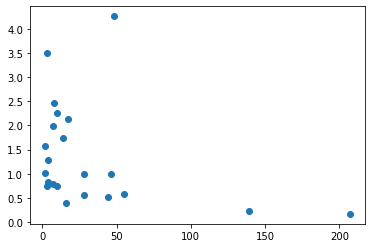

In [110]:
plt.scatter(knn_data['OFFSET COUNT'],knn_data['MEDIAN DURATION'])
plt.show()

In [111]:
scaler = MinMaxScaler()

scaler.fit(knn_data[['MEDIAN DURATION']])
knn_data['MEDIAN DURATION'] = scaler.transform(knn_data[['MEDIAN DURATION']])

scaler.fit(knn_data[['OFFSET COUNT']])
knn_data['OFFSET COUNT'] = scaler.transform(knn_data[['OFFSET COUNT']])

In [112]:
knn_data

,LAST MOD BY,Genus,OFFSET COUNT,MEDIAN DURATION
443,kkong,Chlorestes,0.224390,1.000000
915,kkong,Hemitriccus,0.214634,0.201711
916,dnelson,Hemitriccus,0.024390,0.149169
917,weszhen,Hemitriccus,0.068293,0.057445
918,dnelson,Hemitriccus,0.204878,0.088020
919,EdZamora,Hemitriccus,0.126829,0.097787
920,EdZamora,Hemitriccus,0.258537,0.100244
921,kkong,Hemitriccus,0.029268,0.562372
922,kkong,Hemitriccus,0.000000,0.342298
923,weszhen,Hemitriccus,0.000000,0.208032


In [113]:
clust = len(knn_data['Genus'].unique())
clust

5

In [114]:
clust_ann = len(knn_data['LAST MOD BY'].unique())
clust_ann

6

In [115]:
km2 = KMeans(n_clusters = clust_ann)
y_predicted = km2.fit_predict(knn_data[['OFFSET COUNT','MEDIAN DURATION']])
y_predicted

array([2, 0, 5, 5, 0, 0, 0, 4, 4, 5, 2, 4, 0, 4, 3, 1, 5, 5, 5, 5, 4, 4])

In [116]:
knn_data['cluster'] = y_predicted
knn_data

,LAST MOD BY,Genus,OFFSET COUNT,MEDIAN DURATION,cluster
443,kkong,Chlorestes,0.224390,1.000000,2
915,kkong,Hemitriccus,0.214634,0.201711,0
916,dnelson,Hemitriccus,0.024390,0.149169,5
917,weszhen,Hemitriccus,0.068293,0.057445,5
918,dnelson,Hemitriccus,0.204878,0.088020,0
919,EdZamora,Hemitriccus,0.126829,0.097787,0
920,EdZamora,Hemitriccus,0.258537,0.100244,0
921,kkong,Hemitriccus,0.029268,0.562372,4
922,kkong,Hemitriccus,0.000000,0.342298,4
923,weszhen,Hemitriccus,0.000000,0.208032,5


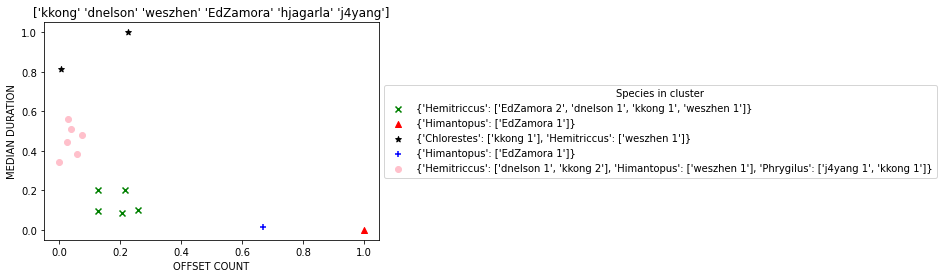

In [117]:
df1 = knn_data[knn_data.cluster == 0]
df2 = knn_data[knn_data.cluster == 1]
df3 = knn_data[knn_data.cluster == 2]
df4 = knn_data[knn_data.cluster == 3]
df5 = knn_data[knn_data.cluster == 4]

plot1 = plt.scatter(df1['OFFSET COUNT'],df1['MEDIAN DURATION'],color = 'green',marker = 'x')
plot2 = plt.scatter(df2['OFFSET COUNT'],df2['MEDIAN DURATION'],color = 'red',marker = '^')
plot3 = plt.scatter(df3['OFFSET COUNT'],df3['MEDIAN DURATION'],color = 'black',marker = '*')
plot4 = plt.scatter(df4['OFFSET COUNT'],df4['MEDIAN DURATION'],color = 'blue',marker = '+')
plot5 = plt.scatter(df5['OFFSET COUNT'],df5['MEDIAN DURATION'],color = 'pink',marker = 'o')

# lab1 = dict((df1['LAST MOD BY']+' '+df1['Genus']).value_counts())
# lab2 = dict((df2['LAST MOD BY']+' '+df2['Genus']).value_counts())
# lab3 = dict((df3['LAST MOD BY']+' '+df3['Genus']).value_counts())
# lab4 = dict((df4['LAST MOD BY']+' '+df4['Genus']).value_counts())
# lab5 = dict((df5['LAST MOD BY']+' '+df5['Genus']).value_counts())

lab1 = df1[['LAST MOD BY','Genus']].groupby(['Genus','LAST MOD BY'])[['LAST MOD BY']].count().rename(columns = {"LAST MOD BY":'COUNT'}).reset_index()
lab1['LAST MOD BY'] = (lab1['LAST MOD BY']+' '+lab1['COUNT'].astype(str))
lab1 = lab1.drop(columns = ['COUNT']).groupby('Genus')['LAST MOD BY'].apply(list).to_dict()

lab2 = df2[['LAST MOD BY','Genus']].groupby(['Genus','LAST MOD BY'])[['LAST MOD BY']].count().rename(columns = {"LAST MOD BY":'COUNT'}).reset_index()
lab2['LAST MOD BY'] = (lab2['LAST MOD BY']+' '+lab2['COUNT'].astype(str))
lab2 = lab2.drop(columns = ['COUNT']).groupby('Genus')['LAST MOD BY'].apply(list).to_dict()

lab3 = df3[['LAST MOD BY','Genus']].groupby(['Genus','LAST MOD BY'])[['LAST MOD BY']].count().rename(columns = {"LAST MOD BY":'COUNT'}).reset_index()
lab3['LAST MOD BY'] = (lab3['LAST MOD BY']+' '+lab3['COUNT'].astype(str))
lab3 = lab3.drop(columns = ['COUNT']).groupby('Genus')['LAST MOD BY'].apply(list).to_dict()

lab4 = df4[['LAST MOD BY','Genus']].groupby(['Genus','LAST MOD BY'])[['LAST MOD BY']].count().rename(columns = {"LAST MOD BY":'COUNT'}).reset_index()
lab4['LAST MOD BY'] = (lab4['LAST MOD BY']+' '+lab4['COUNT'].astype(str))
lab4 = lab4.drop(columns = ['COUNT']).groupby('Genus')['LAST MOD BY'].apply(list).to_dict()

lab5 = df5[['LAST MOD BY','Genus']].groupby(['Genus','LAST MOD BY'])[['LAST MOD BY']].count().rename(columns = {"LAST MOD BY":'COUNT'}).reset_index()
lab5['LAST MOD BY'] = (lab5['LAST MOD BY']+' '+lab5['COUNT'].astype(str))
lab5 = lab5.drop(columns = ['COUNT']).groupby('Genus')['LAST MOD BY'].apply(list).to_dict()

plt.xlabel('OFFSET COUNT')
plt.ylabel('MEDIAN DURATION')
plt.legend([plot1, plot2, plot3, plot4,plot5], [lab1, lab2, lab3, lab4,lab5],loc='center left', bbox_to_anchor=(1, 0.5),title = 'Species in cluster')
plt.title(str(knn_data['LAST MOD BY'].unique()))
plt.show()

In [118]:
# import plotly.express as px 

# fig = px.scatter(df1, x='OFFSET COUNT', y='MEDIAN DURATION',text = 'LAST MOD BY')
# fig2 = px.scatter(df2, x='OFFSET COUNT', y='MEDIAN DURATION',text = 'LAST MOD BY')
# fig.show()

In [119]:
# fig2.show()